In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
% cd /content/drive/MyDrive/DL_PyTorch-master

/content/drive/MyDrive/Colab Notebooks/Re train/DL_PyTorch-master


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import time
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [5]:
data_dir = '/content/drive/MyDrive/DL_PyTorch-master/Cat vs Dog'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize( [0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize( [0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])])
UnKnown_data_transforms = transforms.Compose([transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize( [0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])])
# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
UN_data = datasets.ImageFolder(data_dir + '/UnKnown_data', transform=UnKnown_data_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32,shuffle=True)
UN_loader = torch.utils.data.DataLoader(UN_data, batch_size=32,shuffle=True)

In [6]:
model = models.densenet121(pretrained=True)
model;

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [8]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
model.classifier = nn.Sequential(nn.Linear(1024,256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256,2),
                                 nn.LogSoftmax(dim=1))
    
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(),lr=0.002)
model.to(device);

In [9]:
images,labels = next(iter(testloader))
labels

tensor([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1])

In [10]:
import numpy as np
import Helper

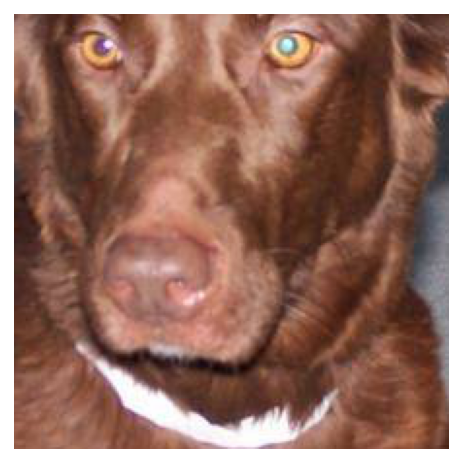

In [11]:
Helper.imshow(images[1])

In [61]:
epochs = 2
print_every = 5
steps = 0 
running_loss = 0
tr_loss = []
ts_loss = []
stp = []
accu = []
for e in range(epochs):
  for images, labels in trainloader:
    steps +=1
    images,labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    if steps % print_every == 0:
      model.eval()
      test_loss = 0
      accuracy = 0
      with torch.no_grad():
        for input, label in testloader:
          input, label = input.to(device),label.to(device)
          output = model.forward(input)
          loss = criterion(output,label)
          test_loss += loss.item()
          ps = torch.exp(output)
          equality = (label.data== ps.max(1)[1]) 
          accuracy += equality.type(torch.FloatTensor).mean()
      print("Epoch:{}/{}...".format(e+1,epochs),
            "Traning_loss:{:.3f}..".format(running_loss/print_every),
            "Testing_loss:{:.3f}..".format(test_loss/len(testloader)),
            "Accuracy:{:.3f}..".format(accuracy/len(testloader)))
      tr_loss.append(running_loss/print_every)
      ts_loss.append(test_loss/len(testloader))
      accu.append(accuracy/len(testloader))
      stp.append(steps)
      running_loss = 0
      model.train()

Epoch:1/2... Traning_loss:0.588.. Testing_loss:0.266.. Accuracy:0.919..
Epoch:1/2... Traning_loss:0.368.. Testing_loss:0.139.. Accuracy:0.955..
Epoch:1/2... Traning_loss:0.155.. Testing_loss:0.100.. Accuracy:0.965..
Epoch:1/2... Traning_loss:0.145.. Testing_loss:0.085.. Accuracy:0.973..
Epoch:1/2... Traning_loss:0.188.. Testing_loss:0.087.. Accuracy:0.963..
Epoch:1/2... Traning_loss:0.144.. Testing_loss:0.075.. Accuracy:0.973..
Epoch:1/2... Traning_loss:0.220.. Testing_loss:0.071.. Accuracy:0.974..
Epoch:1/2... Traning_loss:0.167.. Testing_loss:0.093.. Accuracy:0.962..
Epoch:1/2... Traning_loss:0.132.. Testing_loss:0.237.. Accuracy:0.893..
Epoch:1/2... Traning_loss:0.175.. Testing_loss:0.066.. Accuracy:0.978..
Epoch:1/2... Traning_loss:0.144.. Testing_loss:0.070.. Accuracy:0.976..
Epoch:1/2... Traning_loss:0.119.. Testing_loss:0.073.. Accuracy:0.972..
Epoch:1/2... Traning_loss:0.100.. Testing_loss:0.073.. Accuracy:0.972..
Epoch:1/2... Traning_loss:0.111.. Testing_loss:0.068.. Accuracy:

In [12]:

#torch.save(model.state_dict(), 'Transfer Learning_jayesh.pth')
state_dict = torch.load('Transfer Learning_jayesh.pth')
print(state_dict.keys())
model.load_state_dict(state_dict)
model.state_dict().keys()


odict_keys(['features.conv0.weight', 'features.norm0.weight', 'features.norm0.bias', 'features.norm0.running_mean', 'features.norm0.running_var', 'features.norm0.num_batches_tracked', 'features.denseblock1.denselayer1.norm1.weight', 'features.denseblock1.denselayer1.norm1.bias', 'features.denseblock1.denselayer1.norm1.running_mean', 'features.denseblock1.denselayer1.norm1.running_var', 'features.denseblock1.denselayer1.norm1.num_batches_tracked', 'features.denseblock1.denselayer1.conv1.weight', 'features.denseblock1.denselayer1.norm2.weight', 'features.denseblock1.denselayer1.norm2.bias', 'features.denseblock1.denselayer1.norm2.running_mean', 'features.denseblock1.denselayer1.norm2.running_var', 'features.denseblock1.denselayer1.norm2.num_batches_tracked', 'features.denseblock1.denselayer1.conv2.weight', 'features.denseblock1.denselayer2.norm1.weight', 'features.denseblock1.denselayer2.norm1.bias', 'features.denseblock1.denselayer2.norm1.running_mean', 'features.denseblock1.denselayer2

odict_keys(['features.conv0.weight', 'features.norm0.weight', 'features.norm0.bias', 'features.norm0.running_mean', 'features.norm0.running_var', 'features.norm0.num_batches_tracked', 'features.denseblock1.denselayer1.norm1.weight', 'features.denseblock1.denselayer1.norm1.bias', 'features.denseblock1.denselayer1.norm1.running_mean', 'features.denseblock1.denselayer1.norm1.running_var', 'features.denseblock1.denselayer1.norm1.num_batches_tracked', 'features.denseblock1.denselayer1.conv1.weight', 'features.denseblock1.denselayer1.norm2.weight', 'features.denseblock1.denselayer1.norm2.bias', 'features.denseblock1.denselayer1.norm2.running_mean', 'features.denseblock1.denselayer1.norm2.running_var', 'features.denseblock1.denselayer1.norm2.num_batches_tracked', 'features.denseblock1.denselayer1.conv2.weight', 'features.denseblock1.denselayer2.norm1.weight', 'features.denseblock1.denselayer2.norm1.bias', 'features.denseblock1.denselayer2.norm1.running_mean', 'features.denseblock1.denselayer2

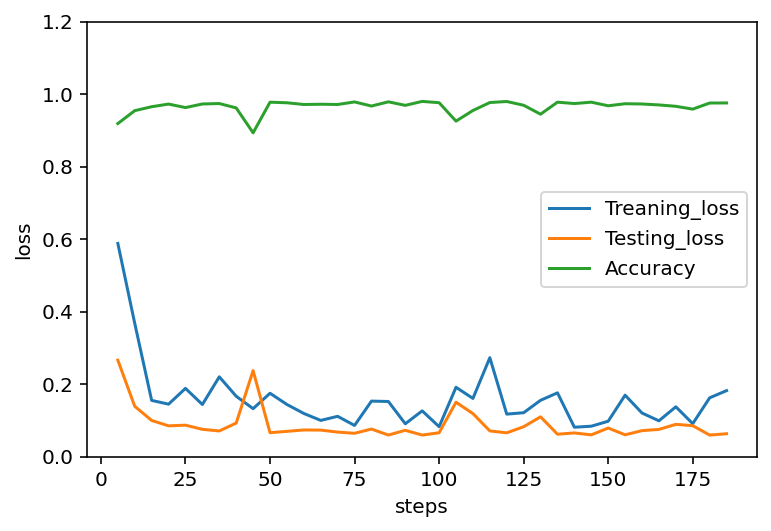

In [100]:
plt.plot(stp,tr_loss,label="Treaning_loss")
plt.plot(stp,ts_loss,label="Testing_loss")
plt.plot(stp,accu,label='Accuracy')
plt.legend()
plt.xlabel('steps')
plt.ylabel('loss');
plt.ylim(0,1.2);

In [13]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

In [14]:
device1 = torch.device(type='cpu')
device1

device(type='cpu')

In [15]:
model.eval()
model.to(device1);
images,labels = next(iter(UN_loader))
images,labels = images.to(device1),labels.to(device1)

tensor([[0.0062, 0.9938]])
Cat 0.00619
Dog 0.99381


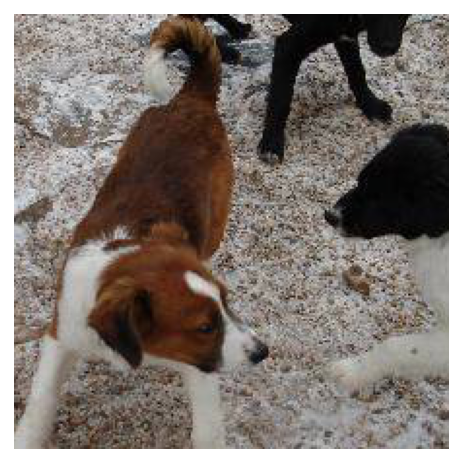

In [18]:
index = 4
imgs = images[index]
img = imgs.resize_ (1, 3, 224, 224)
with torch.no_grad():
  output = model.forward(img)
ps = torch.exp(output)
imshow(images[index],normalize=True), print(ps)
ps = ps.numpy().squeeze()
cat = ps[0]
dog = ps[1]
#print("if scientific notation",cat,dog)
cat = "{:.5f}".format(cat)
dog = "{:.5f}".format(dog)
print("Cat",cat)
print("Dog",dog)

Text(0.5, 0, 'Category')

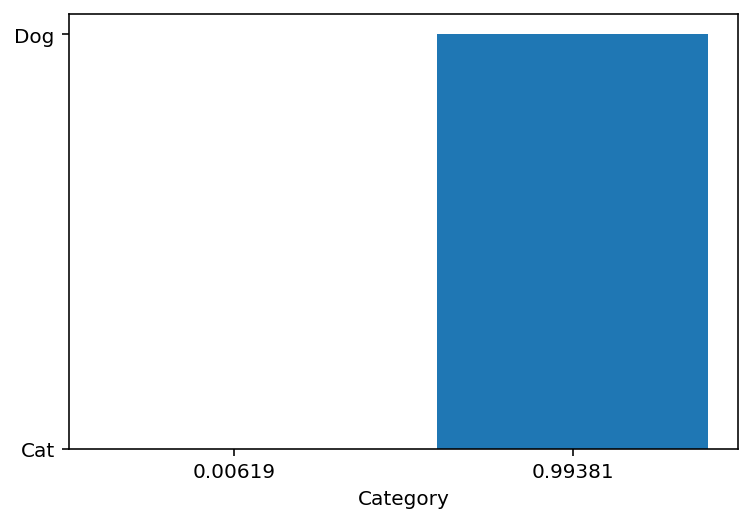

In [19]:
if cat < dog :
  data = {'Cat': cat,'Dog': dog}
else:
  data = {'Dog': dog,'Cat': cat}
names = list(data.keys())
values = list(data.values())
plt.bar(values,names)
plt.xlabel('Category')